C:\Users\jack\AppData\Local\Temp\ipykernel_56168\2418112104.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Corrected_Emotion'].fillna(df['Pipeline_Emotion'], inplace=True)


Train Accuracy: 0.9397
Test Accuracy: 0.6174
Train F1 Score: 0.9412
Test F1 Score: 0.6214
Classification Report:
               precision    recall  f1-score   support

       anger       0.13      0.17      0.15        12
     disgust       0.27      0.80      0.40         5
        fear       0.52      0.42      0.47        26
   happiness       0.47      0.49      0.48       134
     neutral       0.76      0.73      0.75       498
     sadness       0.36      0.24      0.29        34
    surprise       0.25      0.31      0.28        62

    accuracy                           0.62       771
   macro avg       0.40      0.45      0.40       771
weighted avg       0.63      0.62      0.62       771



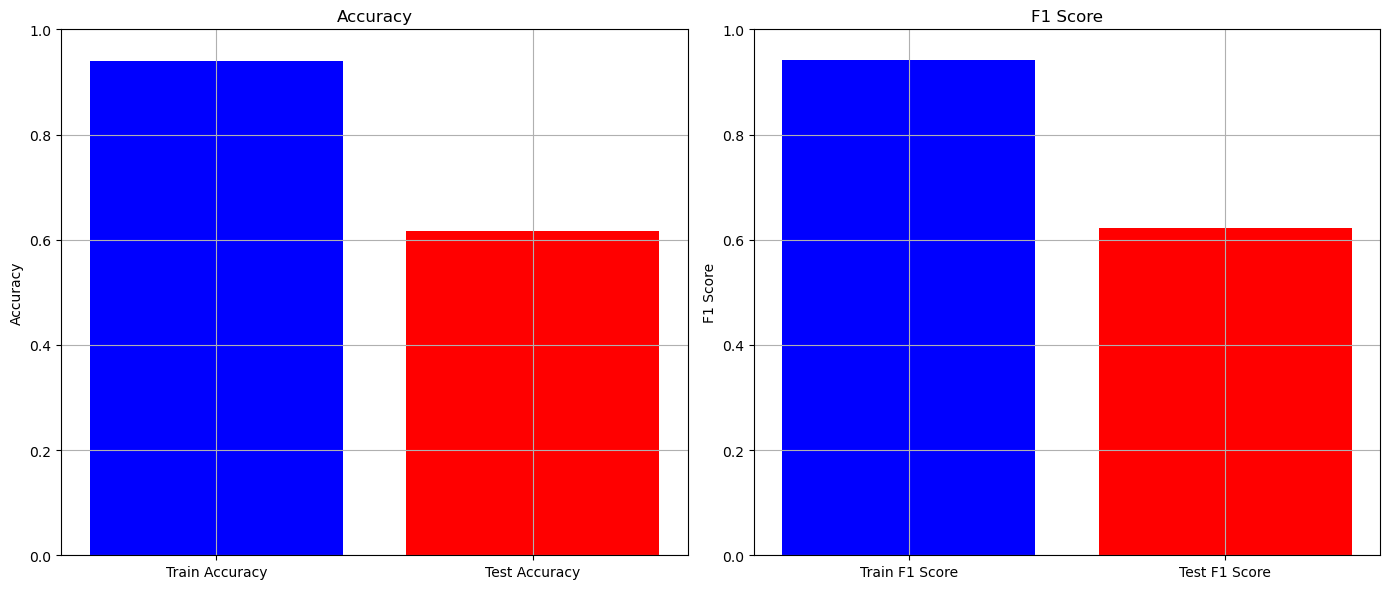

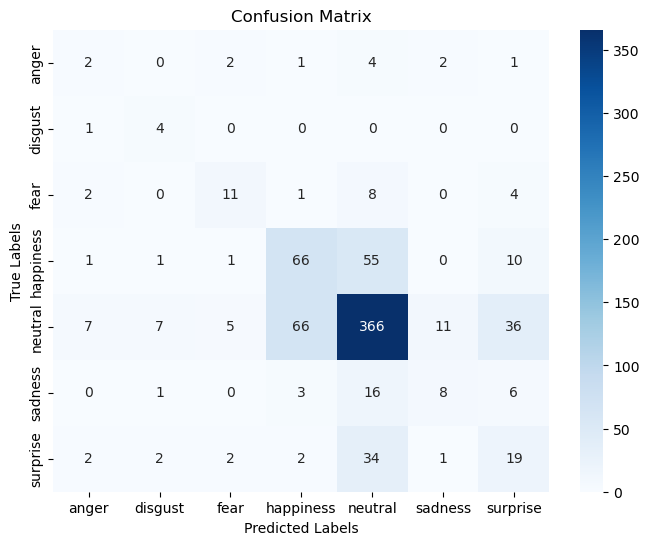

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\jack\Downloads\preprocessed_dataset.csv")

df['Corrected_Emotion'].fillna(df['Pipeline_Emotion'], inplace=True)

X_text = df['Sentence']
y = df['Corrected_Emotion']


y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)


vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X_text)


scaler = StandardScaler(with_mean=False)
X_combined = scaler.fit_transform(X_tfidf)


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression(max_iter=10000, class_weight='balanced', C=0.5)
lr_model.fit(X_train, y_train)


y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f'Train Accuracy: {train_acc:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Train F1 Score: {train_f1:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')


print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=y_encoder.classes_))


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['b', 'r'])
axes[0].set_title('Accuracy')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Accuracy')
axes[0].grid(True)


axes[1].bar(['Train F1 Score', 'Test F1 Score'], [train_f1, test_f1], color=['b', 'r'])
axes[1].set_title('F1 Score')
axes[1].set_ylim([0, 1])
axes[1].set_ylabel('F1 Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()


cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_encoder.classes_, yticklabels=y_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Corrected_Emotion
neutral      2405
happiness     650
surprise      313
sadness       198
fear          168
anger          85
disgust        36
Name: count, dtype: int64


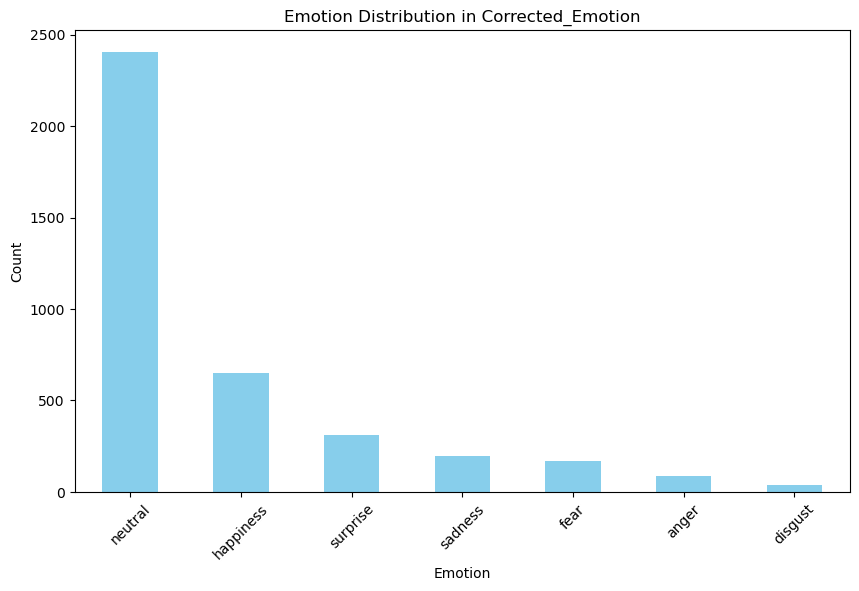

In [19]:
# Count the number of times each emotion appears in the 'Corrected_Emotion' column
emotion_counts = df['Corrected_Emotion'].value_counts()

# Display the counts
print(emotion_counts)

# Optionally, plot the counts as a bar chart
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Distribution in Corrected_Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()